In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

In [2]:
nn.Module

torch.nn.modules.module.Module

In [51]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [52]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True)

##  1. Extend the nn.Module base class.

In [9]:
class Net:
    def __init__(self):
        self.layer = None
        
    def forward(self,tensor):
        tensor = self.layer(tensor)
        return tensor

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) #fc ~ fully connected ~ dense ~ linear
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10) #these 10 are the output categories!

    def forward(self, t):
        # implement the forward pass
        return t

In [8]:
net = Network()
net

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

we choose hyperparameters:
    
    1. kernel size (filter = kernel)
    2. in_channels
    3. out_channels (feature maps (how many of different filters )) 
    4. in_features
    5. out_features

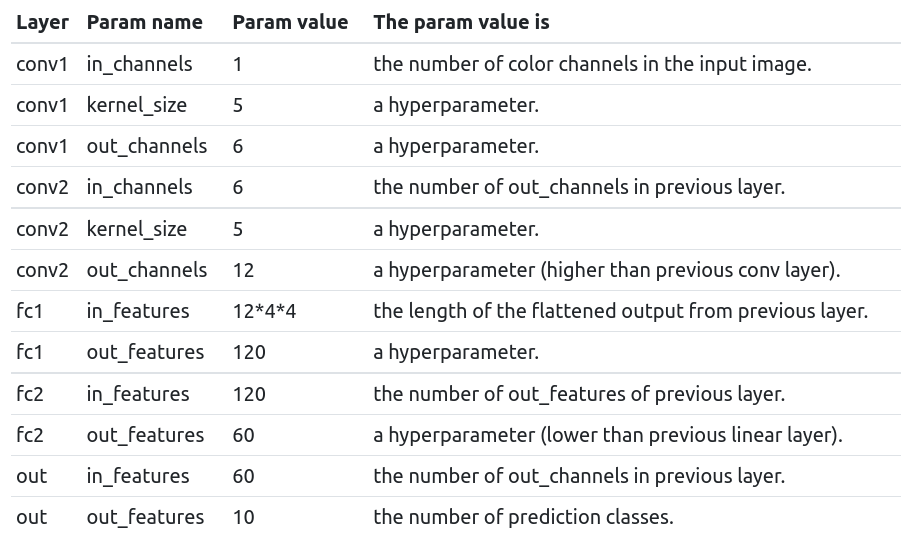

## Learnable parameters (~ weights)

In [11]:
net = Network()

In [14]:
net

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [13]:
net.parameters

<bound method Module.parameters of Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)>

stride = step při filter convoluci

In [16]:
net.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [18]:
net.conv2.weight.shape #(output,input,filter x filter)

torch.Size([12, 6, 5, 5])

In [20]:
net.conv1.weight[0].shape # single filter

torch.Size([1, 5, 5])

In [22]:
net.fc1.weight.shape

torch.Size([120, 192])

 = weight matrix (its 2-d tensor ~ matrix)

## getting params:

In [23]:
for param in net.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [25]:
for name, param in net.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


## Linear layer in depth 

In [32]:
fc = nn.Linear(in_features=4, out_features=3, bias=False)

In [38]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

In [39]:
fc(in_features)

tensor([-1.0705, -4.4987, -0.9569], grad_fn=<SqueezeBackward3>)

## implementing forward method

In [46]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) #fc ~ fully connected ~ dense ~ linear
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10) #these 10 are the output categories!

    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

## more on training

In [80]:
net = Network()

In [72]:
sample = next(iter(train_set))

In [73]:
image,label = sample

In [74]:
prediction = net(image.unsqueeze(0))
prediction

tensor([[ 0.0182,  0.1058,  0.1224, -0.1623,  0.0066, -0.0185,  0.1351,  0.1493,  0.0293, -0.0726]])

In [75]:
F.softmax(prediction,dim=1)

tensor([[0.0983, 0.1073, 0.1090, 0.0820, 0.0971, 0.0947, 0.1104, 0.1120, 0.0994, 0.0897]])

## passing whole batch

In [81]:
batch = next(iter(train_loader))
images, labels = batch

In [82]:
prediction = net(images)

In [83]:
prediction

tensor([[-0.0148,  0.0847,  0.1549,  0.0797,  0.0098,  0.0454,  0.0465, -0.0924, -0.0913,  0.0863],
        [-0.0052,  0.0804,  0.1584,  0.0675,  0.0113,  0.0494,  0.0412, -0.0969, -0.0926,  0.0958],
        [-0.0087,  0.0807,  0.1571,  0.0679,  0.0139,  0.0496,  0.0445, -0.0986, -0.0915,  0.0927],
        [-0.0101,  0.0810,  0.1586,  0.0696,  0.0121,  0.0473,  0.0495, -0.1006, -0.0968,  0.0916],
        [-0.0088,  0.0817,  0.1551,  0.0714,  0.0140,  0.0403,  0.0439, -0.1006, -0.0926,  0.0942],
        [-0.0106,  0.0821,  0.1602,  0.0690,  0.0100,  0.0436,  0.0472, -0.1012, -0.0935,  0.0931],
        [-0.0068,  0.0818,  0.1625,  0.0699,  0.0080,  0.0461,  0.0480, -0.1005, -0.0923,  0.0936],
        [-0.0096,  0.0786,  0.1641,  0.0690,  0.0111,  0.0460,  0.0474, -0.1050, -0.0964,  0.0938],
        [-0.0055,  0.0777,  0.1569,  0.0703,  0.0095,  0.0432,  0.0426, -0.0960, -0.0931,  0.0945],
        [-0.0069,  0.0815,  0.1529,  0.0673,  0.0116,  0.0455,  0.0448, -0.0970, -0.0912,  0.0964]])

In [84]:
prediction.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
labels

tensor([1, 5, 1, 9, 7, 3, 5, 4, 7, 5])

In [86]:
prediction.argmax(dim=1).eq(labels).sum()

tensor(0)

In [154]:
def get_num_correct(pred,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

# Training a net

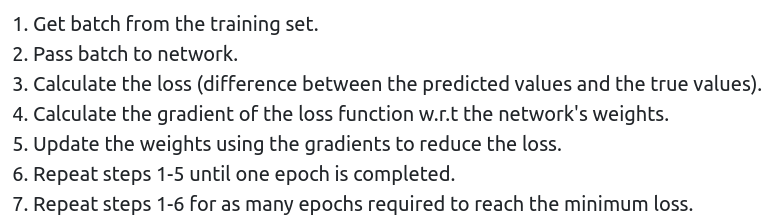

### Net

In [167]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) #fc ~ fully connected ~ dense ~ linear
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10) #these 10 are the output categories!

    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

### data

In [168]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [169]:
net = Network()


### 1.

In [170]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)
batch = next(iter(train_loader))
images,labels = batch

### 2.

In [172]:
preds = net(images)

### 3.

In [173]:
loss = F.cross_entropy(preds,labels)
loss.item()

2.3034303188323975

### 4.

In [143]:
net.conv1.weight.grad

In [195]:
loss.backward()

In [145]:
net.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

### 5.

In [188]:
optimizer = optim.Adam(net.parameters(),lr=0.01)

In [189]:
loss.item()

2.287257194519043

In [190]:
get_num_correct(preds,labels)

12

In [196]:
optimizer.step()

In [197]:
preds = net(images)
loss = F.cross_entropy(preds,labels)

In [198]:
loss.item()

2.1966629028320312

In [199]:
get_num_correct(preds,labels)

15

### single batch demo

In [200]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.2908356189727783
loss2: 2.260761022567749
